# Testing the Conceptual Complexity Graph

## Modules

In [1]:
import json
import re

import numpy as np
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
import igraph
from igraph import Graph, EdgeSeq

In [2]:
# NLTK Related Modules
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yann\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Yann\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

## Constants and Variables

In [4]:
# WordsAPI
ROOT_URL = "https://wordsapiv1.p.rapidapi.com/words/"
HEADER = {"X-RapidAPI-Key": "",
         "X-RapidAPI-Host": "wordsapiv1.p.rapidapi.com"}

In [5]:
stopwords = stopwords.words('english')

In [6]:
regex = re.compile('[,\.!?():;]')

## Helper Functions

In [7]:
def lemmatize(word):
    doc = nlp(word)
    return doc[0].lemma_

def remove_stopwords(words):
    words = words.split(" ")
    for index, word in enumerate(words):
        if word in stopwords:
            words.pop(index)
    return " ".join(words)

def remove_unwanted_characters(string):
    return regex.sub('', string)
    
def get_word_info(word):
    if isinstance(word, str): 
        word = lemmatize(word)
        return json.loads(requests.get(ROOT_URL + word + '/', headers=HEADER).text)
    else:
        raise TypeError("Value must be a string.") 

def get_definitions(word_info_response, word = 'No Word Provided'):
    definitions_text = ""
    try:
        for result in word_info_response['results']:
            definitions_text += str(result['definition']) + ' '
        return remove_stopwords(remove_unwanted_characters(definitions_text))
    except KeyError as e:
        print(f"The word {word} did not return definitions.")

def get_unique_words(words):
    unique_words = []
    words_list = words.split(' ')
    for word in words_list:
        if word not in unique_words and word != '':
            unique_words.append(word)
    return unique_words

def flatten_list(list_of_lists):
    for item in list_of_lists:
        if isinstance(item, list):
            flatten_list(item)
        else:
            flat_list.append(item)
    return flat_list

def create_columns(defined_word, unique_words):
    defined_list = []
    definition_list = []
    for word in unique_words:
        defined_list.append(defined_word)
        definition_list.append(word)
    return defined_list, definition_list

## Testing with the word data

In [8]:
response = get_word_info("data")

In [9]:
definitions = get_definitions(response)

In [10]:
unique_words = get_unique_words(definitions)

In [11]:
unique_words

['item', 'factual', 'information', 'derived', 'measurement', 'research']

In [12]:
word_to_define = []
word_in_definition = []

In [13]:
to_define, in_definition = create_columns("data", unique_words)
word_to_define.extend(to_define)
word_in_definition.extend(in_definition)

In [14]:
word_in_definition

['item', 'factual', 'information', 'derived', 'measurement', 'research']

In [15]:
for word in in_definition:
    unique_words = get_unique_words(get_definitions(get_word_info(word)))
    define, definition = create_columns(word, unique_words)
    word_to_define.extend(define)
    word_in_definition.extend(definition)

In [16]:
data = zip(word_to_define, word_in_definition)
definition_graph = pd.DataFrame(data, columns=['word_to_define', 'word_in_definition'])

In [17]:
definition_graph.head(15)

,word_to_define,word_in_definition
0,data,item
1,data,factual
2,data,information
3,data,derived
4,data,measurement
5,data,research
6,item,individual
7,item,instance
8,item,a
9,item,type


In [18]:
g = Graph.DataFrame(definition_graph, directed=True) 

In [19]:
all_words = word_in_definition.copy()
all_words.insert(0, "data")

## Visualizing the Graph Data

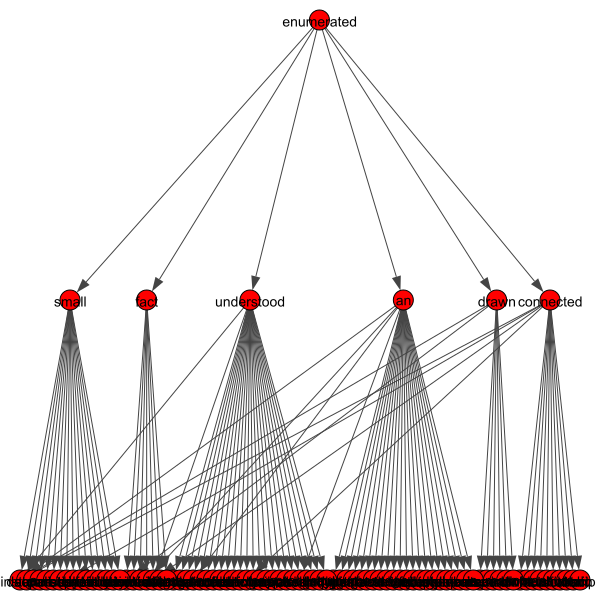

In [20]:
igraph.plot(g,
           vertex_label = all_words,
           layout='rt',
           target="data_rt.png")

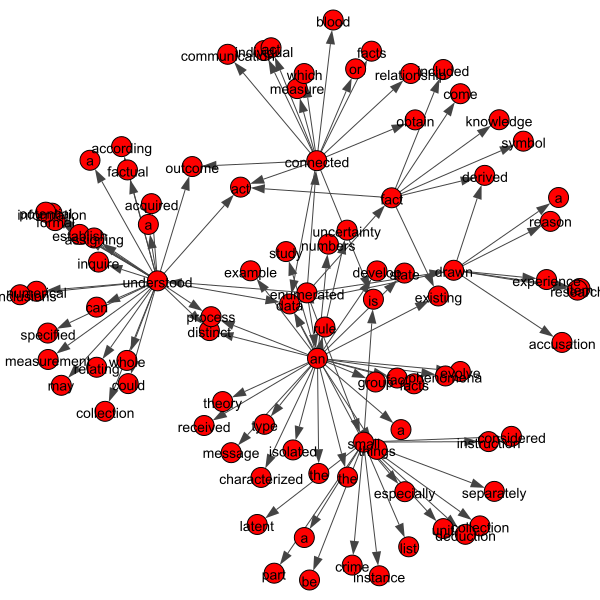

In [21]:
igraph.plot(g,
           vertex_label = all_words,
           layout='kk',
           target="data_kk.png")

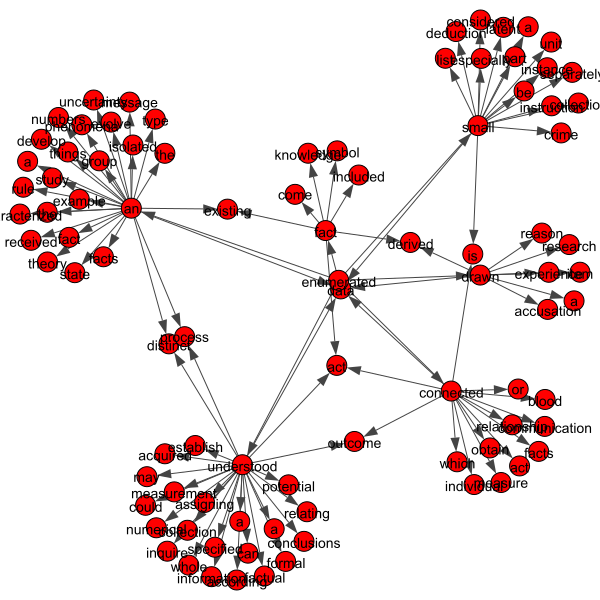

In [22]:
igraph.plot(g,
           vertex_label = all_words,
           layout='fr',
           target="data_fr.png")

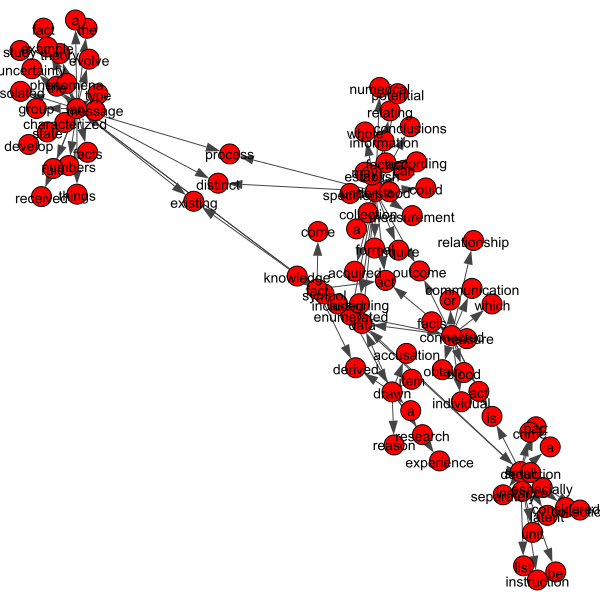

In [23]:
igraph.plot(g,
           vertex_label = all_words,
           layout='drl',
           target="data_drl.png")

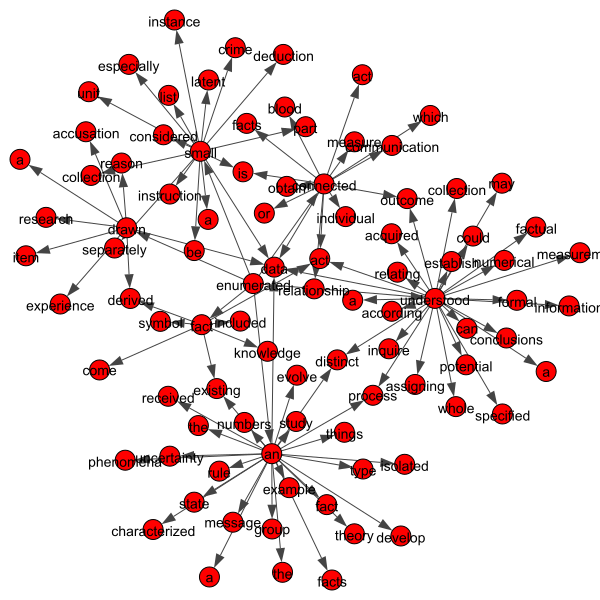

In [24]:
igraph.plot(g,
           vertex_label = all_words,
           layout='lgl',
           target="data_lgl.png")

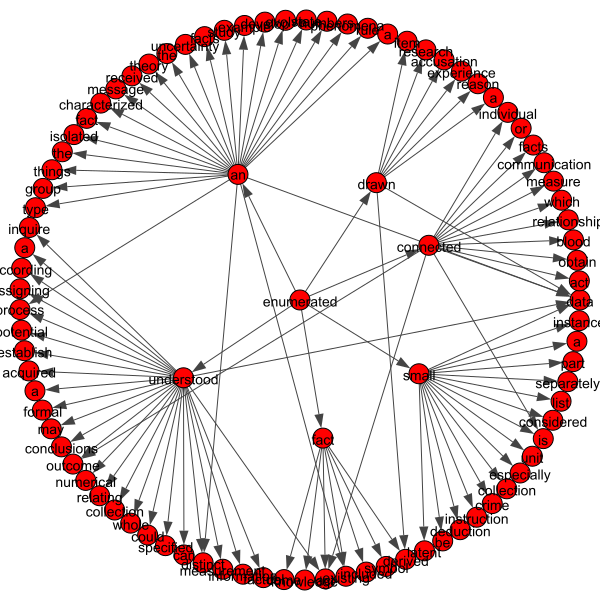

In [25]:
igraph.plot(g,
           vertex_label = all_words,
           layout='rt_circular',
           target="data_rt_circular.png")